In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
names = ['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'race', 'sex', 'hPerWeek', 'native-country','income']
data = pd.read_csv('adult_train.csv', usecols=[0,1,3,4,5,6,8,9,12,13,14], names=names)
print(data.describe())

                age  education-num      hPerWeek
count  32561.000000   32561.000000  32561.000000
mean      38.581647      10.080679     40.437456
std       13.640433       2.572720     12.347429
min       17.000000       1.000000      1.000000
25%       28.000000       9.000000     40.000000
50%       37.000000      10.000000     40.000000
75%       48.000000      12.000000     45.000000
max       90.000000      16.000000     99.000000


## General Characteristics

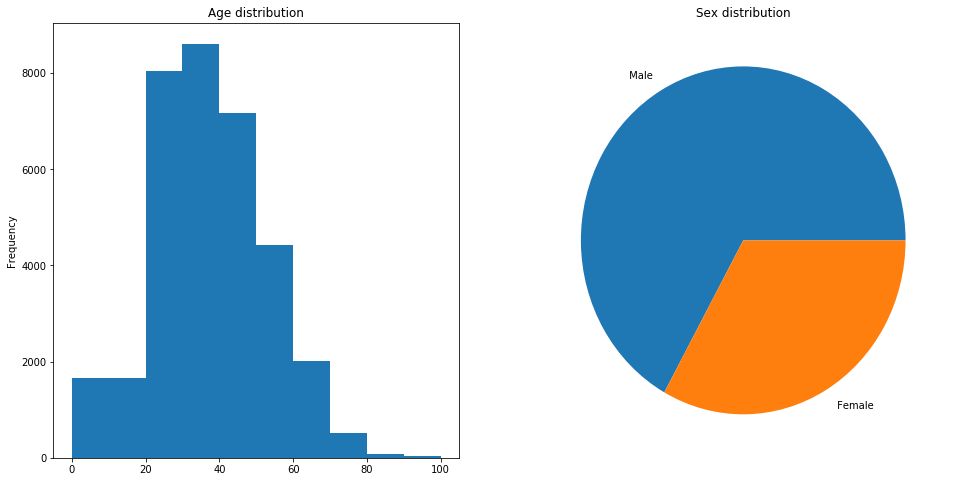

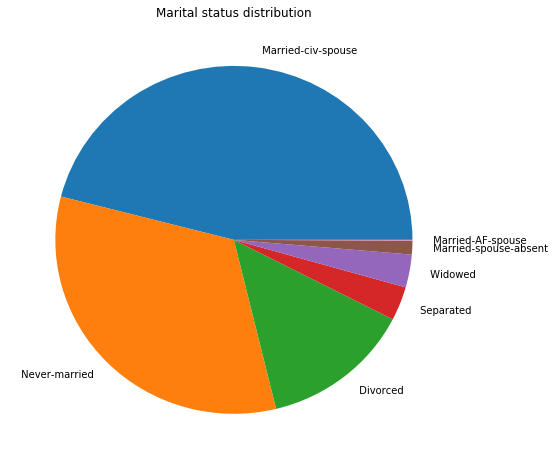

In [3]:
f, ax = plt.subplots(1,2,figsize=(16,8))
data['age'].plot(kind='hist', bins=[0,20,30,40,50,60,70,80,90,100], title='Age distribution', ax=ax[0])
data['sex'].value_counts().plot(kind='pie', title='Sex distribution', ax=ax[1])
ax[1].set_ylabel("")
f, ax = plt.subplots(1,1,figsize=(8,8))
data['marital-status'].value_counts().plot(kind='pie', title='Marital status distribution')
ax.set_ylabel("")

## Ethnic Information

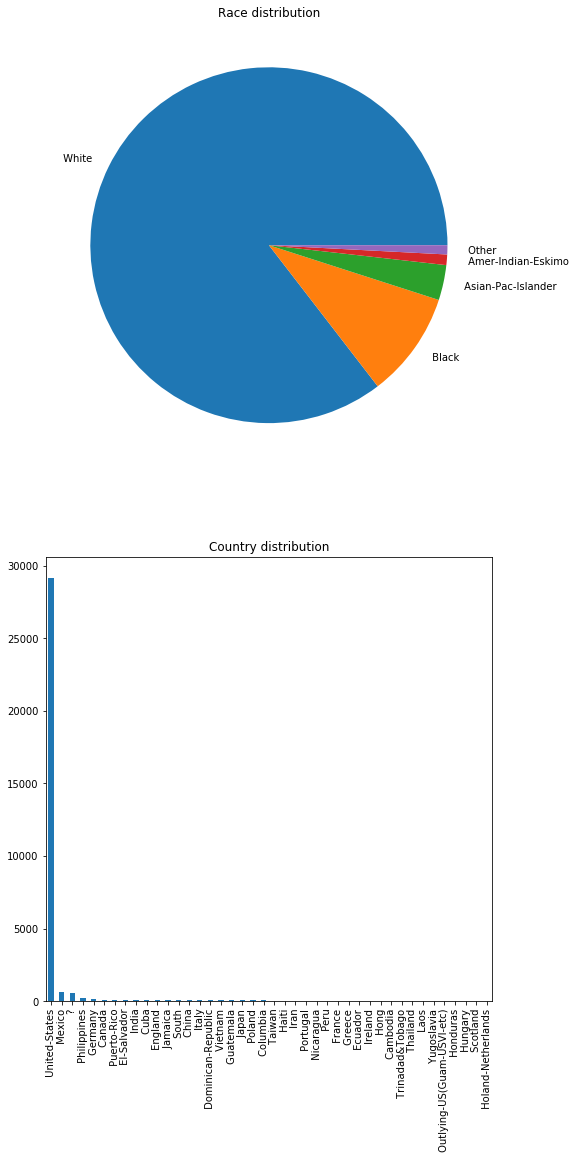

In [4]:
f, ax = plt.subplots(2,1,figsize=(8,18))
data['race'].value_counts().plot(kind='pie', title='Race distribution', ax=ax[0])
data['native-country'].value_counts().plot(kind='bar', title='Country distribution', ax=ax[1])
ax[0].set_ylabel("")
ax[1].set_ylabel("")

## Economic Information

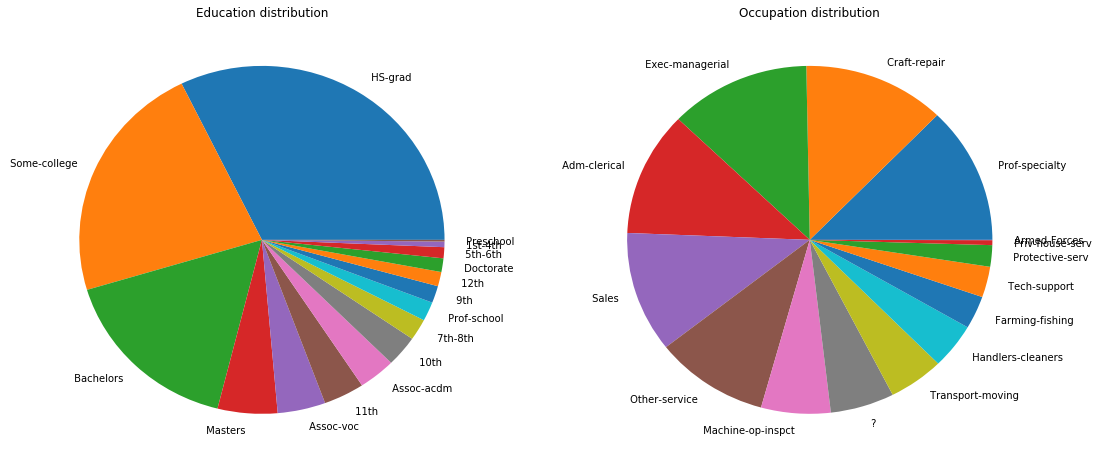

In [5]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['education'].value_counts().plot(kind='pie', title='Education distribution', ax=ax[0])
data['occupation'].value_counts().plot(kind='pie', title='Occupation distribution', ax=ax[1])
ax[0].set_ylabel("")
ax[1].set_ylabel("")

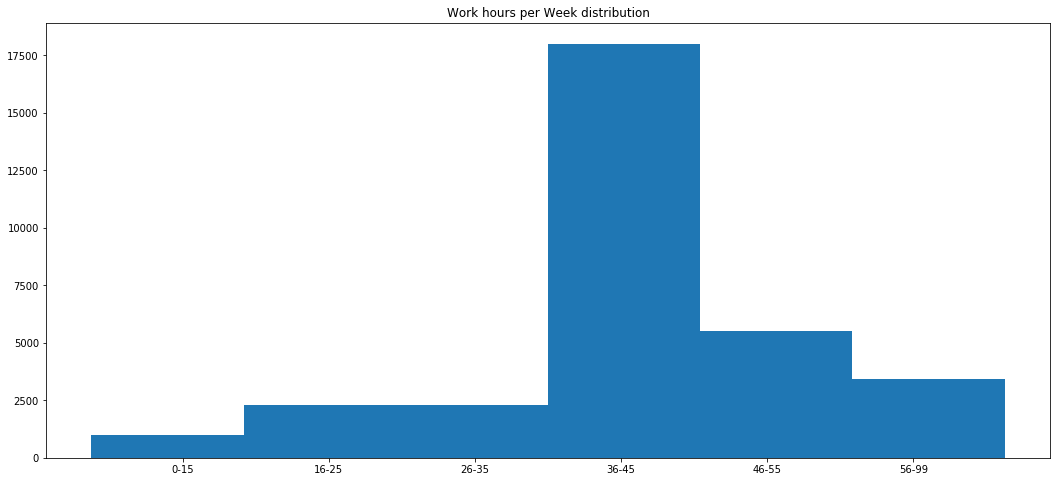

In [6]:
f, ax = plt.subplots(1,1,figsize=(18,8))
#data['hPerWeek'].plot(kind='hist', bins=[0,15,25,35,45,55,99], title='Work hours per Week distribution', ax=ax)
count,_ = np.histogram(data['hPerWeek'], [0,15,25,35,45,55,99])
bins = np.arange(0,6)
ax.hist(bins,weights=count, bins=6)
plt.xticks(0.8*bins+0.5, ["0-15","16-25","26-35","36-45","46-55","56-99"])
plt.title('Work hours per Week distribution')
ax.set_ylabel("")

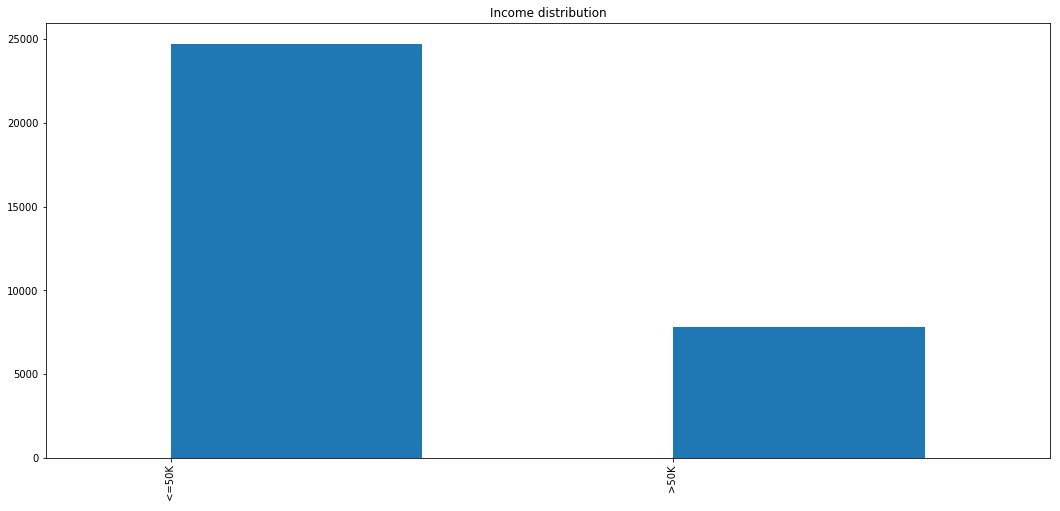

In [7]:
f, ax = plt.subplots(1,1,figsize=(18,8))
data['income'].value_counts().plot(kind='bar', position=0, title='Income distribution', ax=ax)
ax.set_ylabel("")

## Bin Data

### General Characteristics

In [8]:
#Age
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90]
group_names = [0,1,2,3,4,5,6,7]
categories = pd.cut(data['age'], bins, labels=group_names)
data['age'] = pd.cut(data['age'], bins, labels=group_names)

#Sex
sex_dict = {"Male":0 , "Female":1}
data['sex'] = data['sex'].replace(sex_dict)

#Marietal Status
# Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
mar_dict = {"Married-civ-spouse":0 , "Divorced":1, "Never-married":2, "Separated":3,"Widowed":4, "Married-spouse-absent":5,"Married-AF-spouse":6}
data['marital-status'] = data['marital-status'].replace(mar_dict)

## Ethnic information

In [9]:
# Race
#White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
race_dict = {"White":0 , "Asian-Pac-Islander":1,"Amer-Indian-Eskimo":2,"Other":3,"Black":4}
data['race'] = data['race'].replace(race_dict)

# Country of origin
# United-States, Cambodia, England, Puerto-Rico, Canada, Germany,
# Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China,
# Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam,
# Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador,
# Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland,
# Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands
country_dict = {"United-States":0 , "Cambodia":1 , "England":2 , "Puerto-Rico":3 , "Canada":4 , "Germany":5 , "Outlying-US(Guam-USVI-etc)":6 , "India":7 , "Japan":8 , "Greece":9 , "South":10 , "China":11 , "Cuba":12 , "Iran":13 , "Honduras":14 , "Philippines":15 , "Italy":16 , "Poland":17 , "Jamaica":18 , "Vietnam":19 , "Mexico":20 , "Portugal":21 , "Ireland":22 , "France":23 , "Dominican-Republic":24 , "Laos":25 , "Ecuador":26 , "Taiwan":27 , "Haiti":28 , "Columbia":29 , "Hungary":30 , "Guatemala":31 , "Nicaragua":32 , "Scotland":33 , "Thailand":34 , "Yugoslavia":35 , "El-Salvador":36 , "Trinadad&Tobago":37 , "Peru":38 , "Hong":39 , "Holand-Netherlands":40}
data['native-country'] = data['native-country'].replace(country_dict)

## Econnomic Information

In [10]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'race', 'sex', 'hPerWeek', 'native-country', 'income'],
      dtype='object')

In [11]:
#Hours Per Week
# 0-15,16-25,26-35,35-45,46-55,55-99 
bins = [0, 15, 25, 35, 45, 55, 99]
group_names = [0,1,2,3,4,5]
categories = pd.cut(data['hPerWeek'], bins, labels=group_names)
data['hPerWeek'] = pd.cut(data['hPerWeek'], bins, labels=group_names)

#Occupation
# Tech-support, Craft-repair, Other-service, Sales, Exec-managerial,
# Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical,
# Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces
occ_dict = {"Tech-support":0 , "Craft-repair":1 , "Other-service":2 , "Sales":3 , "Exec-managerial":4 , "Prof-specialty":5 , "Handlers-cleaners":6 , "Machine-op-inspct":7 , "Adm-clerical":8 , "Farming-fishing":9 , "Transport-moving":10 , "Priv-house-serv":11 , "Protective-serv":12 , "Armed-Forces":13}
data['occupation'] = data['occupation'].replace(occ_dict)

In [12]:
#Income
income_dict = {"<=50K":0 , ">50K":1}
data['income'] = data['income'].replace(income_dict)

In [14]:
data.to_csv('adult_cleaned.csv',sep=',', index=False)